# Looking at genre popularity

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [159]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

For this investigation, our goal will be to find what movie genres are rated highly among viewers in order make recommendations on what genres our movies should be.

# IMDB Movie Genres

We will begin our investigation with that IMDB related datasets.

### Joining imdb_title_basics_df and imdb_ratings_df

In [160]:
imdb_basics_rating = pd.merge(left=imdb_basics_df,right=imdb_ratings_df,
                               on='tconst',how='inner')

In [161]:
imdb_basics_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [162]:
imdb_basics_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


As we can see, our column of interest, the genres column, appears to have missing data. We will have to address these missing values.

### Dealing with columns with missing values

In [163]:
imdb_basics_rating = imdb_basics_rating[imdb_basics_rating['genres'].isna() != True]

In [164]:
imdb_basics_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


As we can see, the runtime_minutes is the only column with missing data. Since we do not need this column, we will leave it.

### Finding the top 5 movie genres with at least an 8 average rating

We want to know which movie genres are popular. The way we will distinguish which genres are popular will be to look at the movies that were rated at least an 8.

In [165]:
ratings_over_8 = imdb_basics_rating[imdb_basics_rating['averagerating'] >= 8]
ratings_over_8.shape

(9326, 8)

### Getting a list of all genres in the ratings_over_8 dataframe

In [166]:
genres = list(ratings_over_8['genres'])

genres_list = [] #the genre list containning all genres

for genre in genres:
    List = str(genre).split(',')
    for individual_genre in List:
        genres_list.append(individual_genre)
        
len(genres_list) 

15436

### Building a frequency table to see how many movies rated above an 8 are in each movie genre

Note that there are movies that fall into multiple genre categories. To address this, we will increment each genre that those movies with multiple genres fall into.

In [167]:
genre_frequency = {}
for element in genres_list:
    if element in genre_frequency:
        genre_frequency[element] += 1
    else:
        genre_frequency[element] = 1
genre_frequency

count = sum(list(genre_frequency.values()))
count

15436

In [168]:
sorted_imdb_genres = {k: v for k, v in sorted(genre_frequency.items(), key=lambda item: item[1])}
sorted_imdb_genres

{'Game-Show': 1,
 'Short': 1,
 'Reality-TV': 3,
 'Western': 22,
 'Sci-Fi': 95,
 'Animation': 121,
 'Horror': 121,
 'War': 126,
 'Musical': 130,
 'Fantasy': 142,
 'News': 145,
 'Mystery': 224,
 'Sport': 268,
 'Crime': 371,
 'Romance': 395,
 'Adventure': 414,
 'Thriller': 418,
 'Family': 435,
 'Action': 472,
 'Music': 533,
 'History': 600,
 'Biography': 856,
 'Comedy': 1345,
 'Drama': 3189,
 'Documentary': 5009}

### Frequency Chart for IMDB Movie Genres

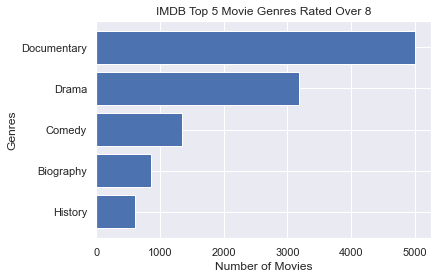

In [169]:
x = list(sorted_imdb_genres.keys())[20:]
y = list(sorted_imdb_genres.values())[20:]

fig, ax = plt.subplots()
ax.barh(x,y)
ax.set_title('IMDB Top 5 Movie Genres Rated Over 8')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genres');

# Rotten Tomatoes Movie Genres

Now we move on to the Rotten Tomatoes datasets. The Rotten Tomatoes reviews dataframes has many missing values which we will handle by dropping.

In [170]:
rt_reviews_df.dropna(inplace=True)

### Merging rt_reviews_df with rt_movies_df

In [171]:
joinedrt = rt_movies_df.set_index('id').join(rt_reviews_df, on = 'id', lsuffix = ' guidelines', rsuffix =' critical')

In [172]:
joinedrt = joinedrt.dropna(subset = ['runtime'])

In [173]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 933 non-null    float64
 12  review             933 non-null    object 
 13  rating critical    933 non-null    object 
 14  fresh              933 non-null    object 
 15  critic             933 non-null    object 
 16  top_critic         933 n

In [174]:
joinedrt['rating critical'].unique()

array([nan, 'C', '2/5', 'B', '3/4', '3/5', '4/4', '6/10', '1/4', '8',
       '2.5/4', '4/10', '2.0/5', 'A-', '5/5', 'F', '3.5/4', '2/4', 'B-',
       '4/5', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10', '2.5/5',
       '7/10', '1.5/5', '1/5', '5/10', '3/10', 'C-', 'C+', '0/5', '6',
       '0.5/4', 'D', '2/10', '7', '3', 'A+', 'A', '4.5/5', '4.0/4', '2.5',
       '3.7/5', '8.4/10', '9', '1', '2.2/5', '0.5/10', '5', '0', '2',
       '0/4', '1/10', '7.5/10', '7.7', '5.0/5', '8.5/10', '3.0/5'],
      dtype=object)

There are many different rating scales in the ratings column. We will normalize the ratings column so all movies follow one unified scale of measurement.

In [175]:
joinedrt['freshnum'] = joinedrt['fresh'].map({'fresh': 1, 'rotten': 0})
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'3/4' : 75, '4/5' : 80, '3/5' : 60, '1/4': 25, '1/5': 20,'3.5/4' : 87, '2/5': 40, '2/4': 50, '3.7/5': 74})
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2.5/4': 63, '3.5/5' : 70, '5/5': 100, 'B': 85, '4/4': 100, 'B+': 88, "A-": 93, '2.5/5' : 50, "8/10" : 80, 'B-': 82, '4.5/5': 90, '1.5/4': 37.5, 'A': 95, '6/10': 60, 'C+': 77, '9/10': 90, "C": 74, 'C-': 72, '5/10': 50, '1.5/5': 30, '7/10': 70})
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'0/5':0, '8': 80, '1': 10, '4/10': 40, 'D+': 69, '7': 70, '3/10': 30, 'D': 67, "0.5/4": 13, '6': 60}) 
joinedrt['rating critical'] = joinedrt['rating critical'].replace({"3": 30, "D-": 66, "1/10": 10, '0/4' : 0, '8.5/10': 85, "A+": 98, '4.0/4': 100, "8.4/10": 84, "9": 90, "F": 35, "7.5/10": 75, "7.7": 77, "2": 20, "0": 0, "2.0/5": 40, '0.5/10': 5}) 
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2/10': 20, '5.0/5': 100, '3.0/5': 60, "2.5": 50, '5': 50, '2.2/5': 44})

In [176]:
joinedrt['rating critical'].value_counts()

75.0     122
80.0     113
60.0      85
100.0     76
50.0      76
87.0      74
63.0      46
40.0      44
70.0      41
85.0      33
88.0      29
90.0      24
93.0      22
95.0      16
20.0      15
37.5      15
82.0      14
74.0      13
30.0      13
77.0      13
25.0      11
72.0      11
10.0       6
0.0        6
69.0       4
84.0       2
67.0       2
98.0       2
13.0       2
44.0       1
5.0        1
35.0       1
Name: rating critical, dtype: int64

In [177]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 933 non-null    float64
 12  review             933 non-null    object 
 13  rating critical    933 non-null    float64
 14  fresh              933 non-null    object 
 15  critic             933 non-null    object 
 16  top_critic         933 n

### Filtering movies with a rating of 8 or above
We will start by dividing the ratings column by 10 to get a rating scale out of 10. Then we pull only the movies that have a rating of 8 or above.

In [178]:
joinedrt['rating critical'] = joinedrt['rating critical']/10
ratings_over_8 = joinedrt[joinedrt['rating critical'] >= 8]

In [179]:
ratings_over_8

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date,freshnum
id,,,,,,,,,,,,,,,,,,,,
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,3.0,The anger over the injustice of the financial ...,8.5,fresh,Robert Roten,0.0,Laramie Movie Scope,"January 7, 2013",1.0
19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing,3.0,A black comedy as dry and deadpan as a bleache...,10.0,fresh,John Beifuss,0.0,"Commercial Appeal (Memphis, TN)","September 10, 2012",1.0
22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,3.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0.0,Arkansas Democrat-Gazette,"September 7, 2012",1.0
35,"In this film, conjoined twins Blake and Franci...",R,Drama,Michael Polish,Michael Polish|Mark Polish,"Jul 30, 1999","Jan 18, 2000",NaN,NaN,110 minutes,NaN,3.0,Though hardly a crowd-pleaser. it's the sort o...,9.3,fresh,Frank Swietek,0.0,One Guy's Opinion,"August 30, 2012",1.0
40,John Sayles' Casa de los Babys tells the tale ...,R,Drama,John Sayles,John Sayles,"Sep 19, 2003","Apr 13, 2004",$,"312,136",95 minutes,NaN,3.0,Cosmopolis is an investment that pays off enor...,10.0,fresh,Peter Sobczynski,0.0,eFilmCritic.com,"August 24, 2012",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN,58.0,All of this is accomplished with wonderfully o...,8.7,fresh,Roger Ebert,1.0,Chicago Sun-Times,"October 23, 2004",1.0
1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures,58.0,"Good, but not great Allen film.",8.0,fresh,Ken Hanke,0.0,"Mountain Xpress (Asheville, NC)","August 14, 2003",1.0
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,58.0,Even the swamps of New Jersey look beautiful.,10.0,fresh,Janet Maslin,1.0,New York Times,"May 20, 2003",1.0


In [180]:
ratings_over_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 13 to 1998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           399 non-null    object 
 1   rating guidelines  405 non-null    object 
 2   genre              404 non-null    object 
 3   director           363 non-null    object 
 4   writer             283 non-null    object 
 5   theater_date       318 non-null    object 
 6   dvd_date           318 non-null    object 
 7   currency           99 non-null     object 
 8   box_office         99 non-null     object 
 9   runtime            405 non-null    object 
 10  studio             138 non-null    object 
 11  id                 405 non-null    float64
 12  review             405 non-null    object 
 13  rating critical    405 non-null    float64
 14  fresh              405 non-null    object 
 15  critic             405 non-null    object 
 16  top_critic         405 n

### Building a frequency dictionary for Rotten Tomatoes movie genres.
In a similar fashion as the way we handled the IMDB genre frequency dictionary, we will construct one for the Rotten Tomatoes data.

In [181]:
genres = list(ratings_over_8['genre'])
genres_list_2 = []
for genre in genres:
    List = str(genre).split('|')
    for individual_genre in List:
        genres_list_2.append(individual_genre)
len(genres_list_2)

940

In [182]:
genre_frequency_2 = {}
for element in genres_list_2:
    if element in genre_frequency_2:
        genre_frequency_2[element] += 1
    else:
        genre_frequency_2[element] = 1
genre_frequency_2

count = sum(list(genre_frequency_2.values()))
count

940

In [183]:
sorted_rt_genres = {k: v for k, v in sorted(genre_frequency_2.items(), key=lambda item: item[1])}
sorted_rt_genres

{'Gay and Lesbian': 1,
 'nan': 1,
 'Cult Movies': 2,
 'Sports and Fitness': 2,
 'Faith and Spirituality': 2,
 'Television': 5,
 'Western': 10,
 'Animation': 18,
 'Special Interest': 20,
 'Documentary': 22,
 'Musical and Performing Arts': 22,
 'Kids and Family': 26,
 'Horror': 26,
 'Romance': 48,
 'Science Fiction and Fantasy': 52,
 'Classics': 58,
 'Art House and International': 62,
 'Mystery and Suspense': 91,
 'Action and Adventure': 103,
 'Comedy': 130,
 'Drama': 239}

### Frequency Chart for Rotten Tomatoes Movie Genres

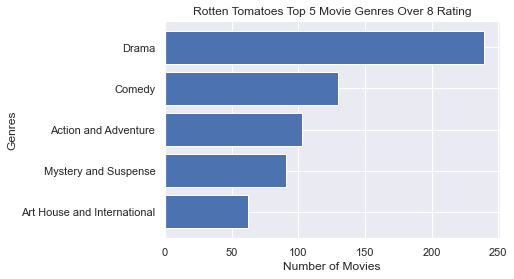

In [146]:
x = list(sorted_rt_genres.keys())[16:]
y = list(sorted_rt_genres.values())[16:]

fig, ax = plt.subplots()
ax.barh(x,y)
ax.set_title('Rotten Tomatoes Top 5 Movie Genres Over 8 Rating')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genres');


### Looking at both IMDB and Rotten Tomatoes popular movie genres

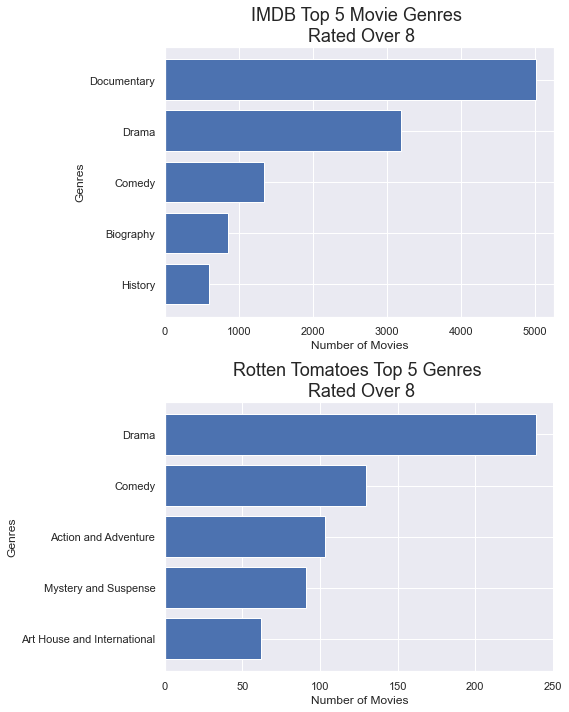

In [149]:
imdb_x = list(sorted_imdb_genres.keys())[20:]
imdb_y = list(sorted_imdb_genres.values())[20:]

rt_x = list(sorted_rt_genres.keys())[16:]
rt_y = list(sorted_rt_genres.values())[16:]

plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.barh(imdb_x,imdb_y)
plt.title('IMDB Top 5 Movie Genres \n Rated Over 8', fontdict = {'fontsize' : 18})
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

plt.subplot(2,1,2)
plt.barh(rt_x,rt_y)
plt.title('Rotten Tomatoes Top 5 Genres \n Rated Over 8', fontdict = {'fontsize' : 18})
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()


Looking at both charts, we see that Dramas and Comedy movies have ratings above an 8 and thus have a great reception among viewers. We can also see that Documentary movies holds the most occurance of movies rated an 8 or above from the Rotten Tomato data. Using this information we can make the suggestion of including Movies of the Drama, Comedy, and Documentary genres into our production of movies. 